In [ ]:
# ENGR014
# Assignment 2
# 01/24/2019
# Hunter Lee

In [2]:
# bring in the usual libraries
%matplotlib inline
import numpy as np
import pandas as pd   # we are not actually using pandas this time
import matplotlib.pyplot as plt

## Simulate a one-tank CSTR:

Text(0, 0.5, 'Fraction of Molecules Exiting')

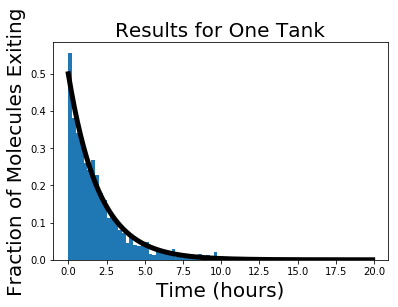

In [3]:
# a function to generate residence time of molecules
def inverse_exp(y,tau):
    time_in_tank = -tau*np.log(1.0 - y)  # inverse of integrated eqn. 2.14 (p. 39) 
    return time_in_tank
#
tau = float(2) # set value for the time constant as a floating point type (or tau=2.0)
n = 1000     # the number of molecules to track
u = np.random.rand(n)  # generate a numpy array of n random numbers between 0 and 1
t_molecule = np.empty(n)  # generate an empty numpy array of size n 
for i in range(0,n):   # simulate time spent for each molecule i = 1,2, ..., n
    t_molecule[i] = inverse_exp(u[i],tau)  # generate a simulated time for this molecule
bin_array = np.arange(0,20,0.25)  # numpy array containing histogram bins
plt.hist(t_molecule,density=True,bins=bin_array)  # create histogram of simulated times
t = np.arange(0,20,0.1)   # numpy array for horizontal axis of theoretical distribution
f = (1.0/tau)*np.exp(-t/tau) # fraction of molecules exiting tank at time t
plt.plot(t,f,color='black',lw=5)  # generate the theoretical distribution
plt.title("Results for One Tank",fontsize=20)
plt.xlabel("Time (hours)",fontsize=20)
plt.ylabel("Fraction of Molecules Exiting",fontsize=20)

Text(0, 0.5, 'Fraction of Molecules Exiting')

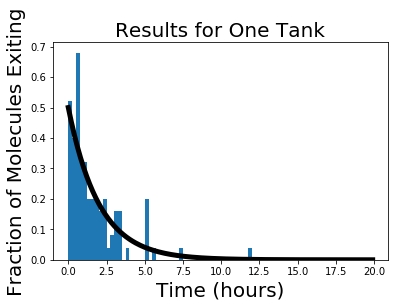

In [4]:
# PART A
# Simulate different number of molecules

# a function to generate residence time of molecules
def inverse_exp(y,tau):
    time_in_tank = -tau*np.log(1.0 - y)  # inverse of integrated eqn. 2.14 (p. 39) 
    return time_in_tank
#
tau = float(2) # set value for the time constant as a floating point type (or tau=2.0)
n = 100     # the number of molecules to track
u = np.random.rand(n)  # generate a numpy array of n random numbers between 0 and 1
t_molecule = np.empty(n)  # generate an empty numpy array of size n 
for i in range(0,n):   # simulate time spent for each molecule i = 1,2, ..., n
    t_molecule[i] = inverse_exp(u[i],tau)  # generate a simulated time for this molecule
bin_array = np.arange(0,20,0.25)  # numpy array containing histogram bins
plt.hist(t_molecule,density=True,bins=bin_array)  # create histogram of simulated times
t = np.arange(0,20,0.1)   # numpy array for horizontal axis of theoretical distribution
f = (1.0/tau)*np.exp(-t/tau) # fraction of molecules exiting tank at time t
plt.plot(t,f,color='black',lw=5)  # generate the theoretical distribution
plt.title("Results for One Tank",fontsize=20)
plt.xlabel("Time (hours)",fontsize=20)
plt.ylabel("Fraction of Molecules Exiting",fontsize=20)

# Part A

We notice that the plot has less 'resolution' and converges less to the theoretical distribution when the number of molecules decrease, when we compare the plots for 100 and 1000 molecules.


## Simulate two-tank CSTR:

Text(0, 0.5, 'Fraction of Molecules Exiting')

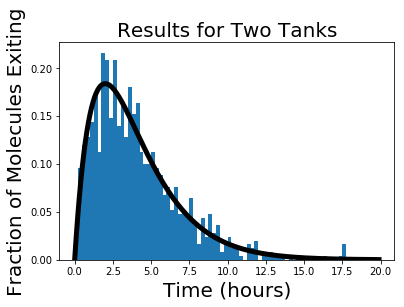

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def inverse_exp(y,tau):
    return -tau*np.log(1.0 - y)
tau = 2.0
n = 1000            #number of molecules to track
y1 = np.random.rand(n)  # generate n random numbers between 0 and 1
t1 = np.empty(len(y1))
for i in range(len(y1)):
    t1[i] = inverse_exp(y1[i],tau)
y2 = np.random.rand(n)  # generate n random numbers between 0 and 1
t2 = np.empty(len(y2))
for i in range(len(y2)):
    t2[i] = inverse_exp(y2[i],tau)
t_total = t1 + t2
bin_array = np.arange(0,20,0.25)
plt.hist(t_total,density=True,bins=bin_array)
t = np.arange(0,20,0.1)
f = (t/tau**2)*np.exp(-t/tau)
plt.plot(t,f,color='black',lw=5)
plt.title("Results for Two Tanks",fontsize=20)
plt.xlabel("Time (hours)",fontsize=20)
plt.ylabel("Fraction of Molecules Exiting",fontsize=20)

# Part B

We notice that the curve moves rightward and the left side of the mode drop quickly to zero. It takes longer for the molecule to exit the two tanks, which explains why the curve generally moved rightward, and it is less likely that the molecule takes almost no time to exit, which explains the drop on the left side of the mode.

Text(0, 0.5, 'Fraction of Molecules Exiting')

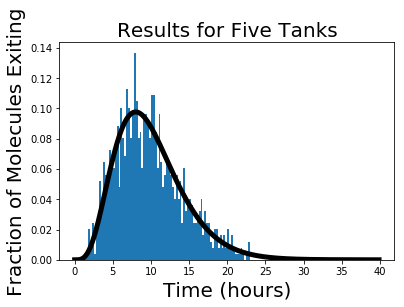

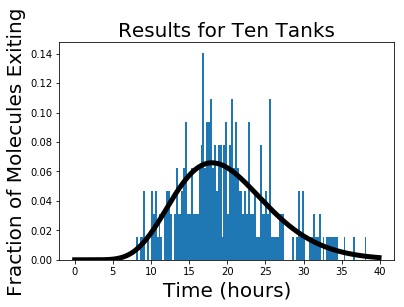

In [10]:
# PART C
# Create a function with input n, the number of consecutive tanks

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial

def exit_time(tau, num_tanks, num_molecules):
    def inverse_exp(y,tau):
        return -tau*np.log(1.0 - y)
    n = num_molecules       # number of molecules to track
    t = np.empty(n)
    for i in range(num_tanks):
        temp = np.empty(t.shape)
        y = np.random.rand(n)  # generate n random numbers between 0 and 1
        for i in range(len(y)):
            temp[i] = inverse_exp(y[i],tau)
        t += temp
    return t

plt.figure(1)
tau = 2.0
num_tanks = 5
t_total = exit_time(tau, num_tanks, num_molecules = 1000)
bin_array = np.arange(0,25,0.25)
plt.hist(t_total,density=True,bins=bin_array)
t = np.arange(0,40,0.1)
f = (t**(num_tanks-1)/tau**(num_tanks)/factorial(num_tanks-1))*np.exp(-t/tau)
plt.plot(t,f,color='black',lw=5)
plt.title("Results for Five Tanks",fontsize=20)
plt.xlabel("Time (hours)",fontsize=20)
plt.ylabel("Fraction of Molecules Exiting",fontsize=20)

plt.figure(2)
tau = 2.0
num_tanks = 10
t_total = exit_time(tau, num_tanks, num_molecules = 1000)
bin_array = np.arange(0,40,0.25)
plt.hist(t_total,density=True,bins=bin_array)
t = np.arange(0,40,0.1)
f = (t**(num_tanks-1)/tau**(num_tanks)/factorial(num_tanks-1))*np.exp(-t/tau)
plt.plot(t,f,color='black',lw=5)
plt.title("Results for Ten Tanks",fontsize=20)
plt.xlabel("Time (hours)",fontsize=20)
plt.ylabel("Fraction of Molecules Exiting",fontsize=20)


# PART C

Compare the shapes of the plots you generated for all four cases (1, 2, 5, and 10 tanks), and write a short paragraph explaining how they differ. 

As the number of tanks increase, the mode of the plot moves rightward, and the skew of the plots disappear to become symmetrical around the mode. The convergence of theoretical distribution and the actual distribution lessens with more tanks -- it may be due to the increasing spread and range of exit times as the number of tanks increase.

If you were to continue increasing the number of tanks in series, can you name the category of distribution (zoo animal) that the system is converging towards?

It would converge to the Normal distribution.